In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import   ttest_1samp

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
file1 = pd.read_csv('E:\Data Science & Business Analytics\Statistical Methods for Decision Making\Assignment\Wholesale+Customers+Data.csv')

In [3]:
file1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [4]:
file1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


From the descriptive statistics, we can see that there are 2 unique types of channel (namely Retail and Hotel), and 3 unique types of region (namely Lisbon, Oporto, and Other) available in the dataset. 
Among all, Hotel in Other region is the most frequent channel type. Average spent of the Fresh is 12000.297 which is the maximum among all the item list. The minimum quantity of the items varies from 3.0 to 55.0 while the maximum item quantity spent varies from 40827.0 to 112151.0.
NaN shows that the values cannot be calculated for that particular variables. Like we can calculate mean for a categorical or object type variable, and in a same way unique value for a numerical variable.

In [5]:
file1['Total_Spent'] = file1['Fresh']+file1['Milk']+file1['Grocery']+file1['Frozen']+file1['Detergents_Paper']+file1['Delicatessen']
file1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [6]:
file1.sort_values(by = 'Region')[['Region','Channel', 'Total_Spent']].max()

Region          Other
Channel        Retail
Total_Spent    199891
dtype: object

In [7]:
file1.sort_values(by = 'Region')[['Region','Channel', 'Total_Spent']].min()

Region         Lisbon
Channel         Hotel
Total_Spent       904
dtype: object

Retail in the other region spent most, and the total spent is around 0.2 million.

Hotel in Lisbon spent least, and the total spent is around 900.

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

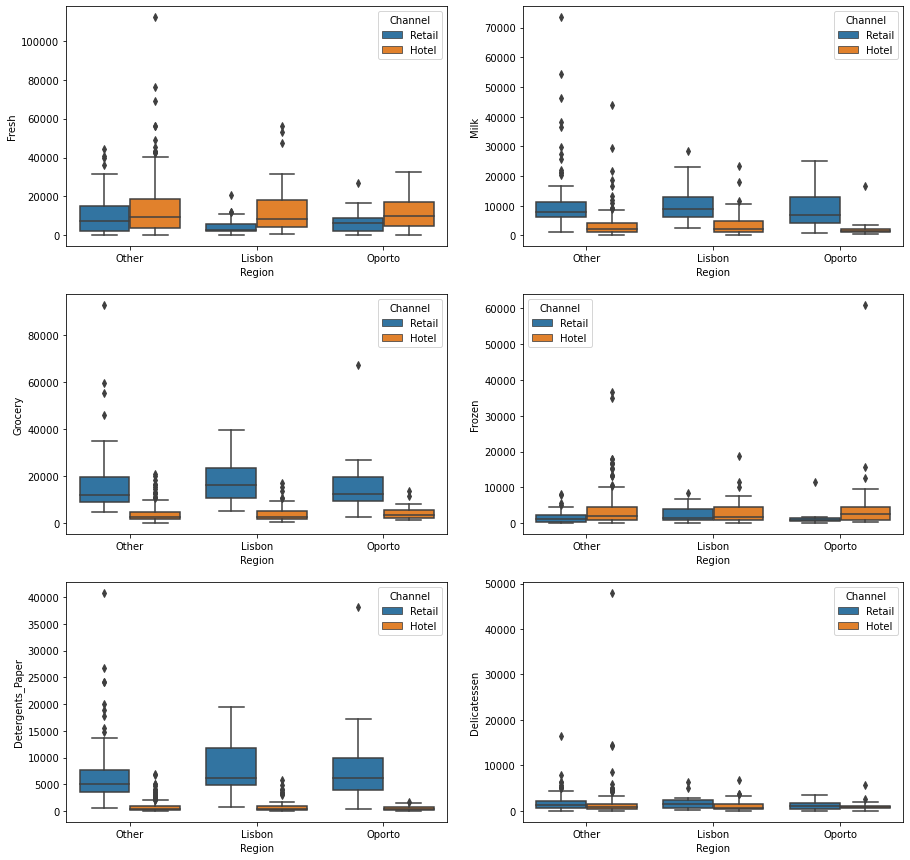

In [8]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.boxplot(x = file1['Region'], y = file1['Fresh'], hue = file1['Channel'])

plt.subplot(3,2,2)
sns.boxplot(x = file1['Region'], y = file1['Milk'], hue = file1['Channel'])

plt.subplot(3,2,3)
sns.boxplot(x = file1['Region'], y = file1['Grocery'], hue = file1['Channel'])

plt.subplot(3,2,4)
sns.boxplot(x = file1['Region'], y = file1['Frozen'], hue = file1['Channel'])

plt.subplot(3,2,5)
sns.boxplot(x = file1['Region'], y = file1['Detergents_Paper'], hue = file1['Channel'])

plt.subplot(3,2,6)
sns.boxplot(x = file1['Region'], y = file1['Delicatessen'], hue = file1['Channel'])

plt.show()


1. Fresh: Hotel is consistently best preferred channel for the Fresh item in three regions, while the retail channel shows flactuations. Hotel in Oporto, are the stable buyes/spender of the Fresh item as there is no outliers. Except hotel in Oporto, all other channels  the tree regions show presence of extreme values, and among them hotel from other region is is highly skewed, as there are quiet a lot of extreme values. 
    
    
2. Milk: No channels are consistent over three regions for the item Milk. Hotel over the three regions show pooor demand for the Milk. Among them, retail in Oporto shows slightly skewed, but no outliers. While the other channels in the three regions show outliers and among them retail in other region is highly skewed, there are quiet a lot of extreme values.
    
    
3. Grocery: Both the channels show consistency over three regions. Though the count of this item in retail channel is higher than in hotel chain, but their distribution is almost normal. While the hotel over the three regions are right skewed. Except retail in Lisbon, all the channels in the three regions shows presence of outliers.
    
    
4. Frozen: It's demand is consistent in hotel rather than retail channel over three regions. The hotel in Oporto shows normal distribution while the retail is very low. Every channels in the three regions show few outliers.


5. Detergents_Paper: The demand of this item in retail channel over the three regions are higher than hotel. The distribution of retails in Lisbon shows no outlier and Oporto shows one outlier respectively. The retail in other region shows lots of extreme values, and found highly skewed while in Lisbon and Oporto the distributions are slightly skewed. 


6. Delicatessen: The demand of this item is not at all promissing in either channels over the three regions. All the plot shows presence of outliers, except the retail in Oporto. 

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [9]:
(file1.std()/file1.mean()).drop('Buyer/Spender', axis=0)

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
Total_Spent         0.793240
dtype: float64

From the above table, we can say that, Fresh show the least inconsistent behavior in the declared items as the coefficient of variation is the lowest for it. On the other hand, Delicatessen show the most inconsistent behavior in the declared items as the coefficient of variation is the highest.

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

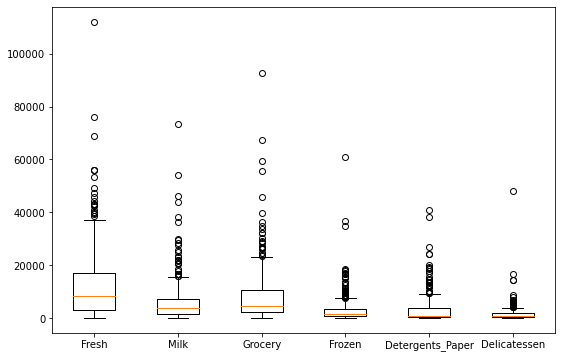

In [10]:
fig = plt.figure(1, figsize=(9, 6))

ax = fig.add_subplot(111)
file1_demo = file1.copy()

file1_demo.drop(['Buyer/Spender', 'Region', 'Channel', 'Total_Spent'], axis=1, inplace = True)
file1_demo

ah = ax.boxplot(file1_demo)
ax.set_xticklabels(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])

plt.show()

Yes, each items have outliers. The plot shows Fresh item is the most preferable one for though it has lots of extreme values, and found highly skewed. The same behaviour observed in Grocery, which is the preferable item next to Fresh. No items show normal distribution and all outliers are found in one side. 

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

1. There is much difference in the retai and hotel spent in the three regions. The minimum spent is not attactive and care must be taken to increase the minimun spent specially to the items like Fresh, Grocery, Detergents_Paper, and Delicatessen. 
2. The spent for all the item shows lots of extreame values, which increase the variability in the dataset. This inturn reduce the statistical power.

In [11]:
file2 = pd.read_csv('E:\Data Science & Business Analytics\Statistical Methods for Decision Making\Assignment\Survey-1.csv')

In [12]:
file2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [13]:
pd.crosstab(file2['Gender'],file2['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [14]:
pd.crosstab(file2['Gender'],file2['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [15]:
pd.crosstab(file2['Gender'],file2['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [16]:
pd.crosstab(file2['Gender'],file2['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [17]:
file2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [18]:
print('The probability that a randomly selected CMSU student will be male is', round(29/len(file2['Gender']),3))
print('The probability that a randomly selected CMSU student will be female is', round(33/len(file2['Gender']),3))

The probability that a randomly selected CMSU student will be male is 0.468
The probability that a randomly selected CMSU student will be female is 0.532


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [19]:
print('Among MALE candidates:')
print()
print('Probability of Major as Accounting :',round((4/29),3))
print('Probability of Major as CIS:',round((1/29),3))
print('Probability of Major as Economics/Finance:',round((4/29),3))
print('Probability of Major as International Business:',round((2/29),3))
print('Probability of Major as Management:',round((6/29),3))
print('Probability of Major as Other:',round((4/29),3))
print('Probability of Major as Retailing/Marketing:',round((5/29),3))
print('Probability of Major as Undecided:',round((3/29),3))
print()
print('Among FEMALE candidates:')
print()
print('Probability of Major as Accounting:',round((3/33),3))
print('Probability of Major as CIS:',round((3/33),3))
print('Probability of Major as Economics/Finance:',round((7/33),3))
print('Probability of Major as International Business:',round((4/33),3))
print('Probability of Major as Management:',round((4/33),3))
print('Probability of Major as Other:',round((3/33),3))
print('Probability of Major as Retailing/Marketing:',round((9/33),3))
print('Probability of Major as Undecided:',round((0/33),3))

Among MALE candidates:

Probability of Major as Accounting : 0.138
Probability of Major as CIS: 0.034
Probability of Major as Economics/Finance: 0.138
Probability of Major as International Business: 0.069
Probability of Major as Management: 0.207
Probability of Major as Other: 0.138
Probability of Major as Retailing/Marketing: 0.172
Probability of Major as Undecided: 0.103

Among FEMALE candidates:

Probability of Major as Accounting: 0.091
Probability of Major as CIS: 0.091
Probability of Major as Economics/Finance: 0.212
Probability of Major as International Business: 0.121
Probability of Major as Management: 0.121
Probability of Major as Other: 0.091
Probability of Major as Retailing/Marketing: 0.273
Probability of Major as Undecided: 0.0


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [20]:
print('The probability that a randomly chosen student is a male and intends to graduate is:', round((17/29) * (29/62),3))
print('The probability that a randomly selected student is a female and does NOT have a laptop is:', round((47/33) * (33/62),3))

The probability that a randomly chosen student is a male and intends to graduate is: 0.274
The probability that a randomly selected student is a female and does NOT have a laptop is: 0.758


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [21]:
print('The probability that a randomly chosen student is a male or has full-time employment is:', round((7/29) + (29/62),3))
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is:', round((4/33+4/33),3))

The probability that a randomly chosen student is a male or has full-time employment is: 0.709
The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is: 0.242


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [22]:
pd.crosstab(file2['Gender'],file2['Grad Intention']).drop('Undecided',axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [23]:
P_Female = 33/62 
P_graduate_intention = 28/33
P_graduate_intention_and_Female = 11/62

if ((P_Female*P_graduate_intention)==P_graduate_intention_and_Female):
    print('The graduate intention and being female are independent events.')
else:
    print('The graduate intention and being female are not independent events.')
    

The graduate intention and being female are not independent events.


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [24]:
file21 = file2.copy()
file21.drop(['ID','Age','Social Networking','Satisfaction'], axis = 1).describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


In [25]:
z = (3-3.129032)/0.377388
print('The probability of a student selected randomly, having GPA less than 3 is:',stats.norm.cdf(z))

The probability of a student selected randomly, having GPA less than 3 is: 0.36621004084820064


In [26]:
pd.crosstab(file2['Gender'],file2['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [27]:
print('The conditional probability that a randomly selected male earns 50 or more is:',round((4/29+1/29+1/29+3/29+3/29+1/29+1/29),3))
print('The conditional probability that a randomly selected female earns 50 or more is:',round((5/33+5/33+5/33+1/33+1/33+1/33),3))

The conditional probability that a randomly selected male earns 50 or more is: 0.483
The conditional probability that a randomly selected female earns 50 or more is: 0.545


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

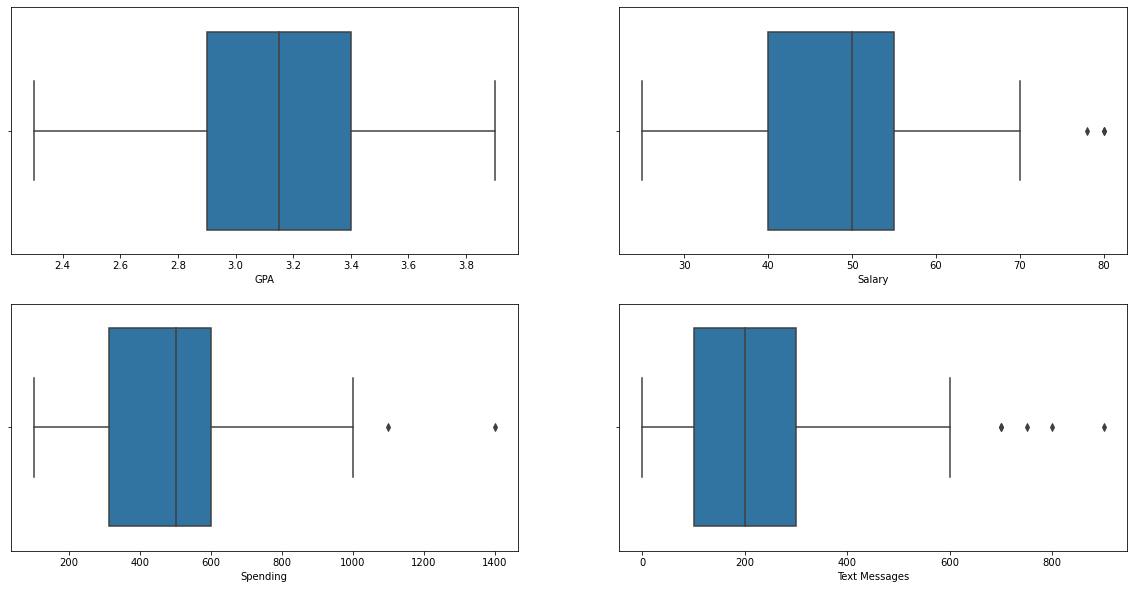

In [28]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
sns.boxplot(file2['GPA'])
plt.subplot(2,2,2)
sns.boxplot(file2['Salary'])
plt.subplot(2,2,3)
sns.boxplot(file2['Spending'])
plt.subplot(2,2,4)
sns.boxplot(file2['Text Messages'])
plt.show()

The distribution for GPA is found normal, and having no outliers. For Salary and Spending the median is closer to the top of the box, and as the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).

In [29]:
file3 = pd.read_csv('E:\Data Science & Business Analytics\Statistical Methods for Decision Making\Assignment\A+&+B+shingles.csv')

In [30]:
file3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [31]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [32]:
file3.isnull().sum()

A    0
B    5
dtype: int64

In [33]:
file3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

H0 = The mean moisture content >= 0.35

H1 = The mean moisture content <0.35

n_A = 36 and n_B = 31

In [34]:
tstat_A,pValue_A = stats.ttest_1samp(file3['A'].dropna(),0.35)
print('The corrected, p-Value for A type:',round(pValue_A/2,3))

tstat_B,pValue_B = stats.ttest_1samp(file3['B'].dropna(),0.35)
print('The corrected, p-Value for B type:',round(pValue_B/2,3))

The corrected, p-Value for A type: 0.075
The corrected, p-Value for B type: 0.002


The p-Value for A type shingles is > 0.05. So, we do not have enough evidence to prove that the mean moisture content for 'A shingles' will be greater than and equal to 0.35 pounds per 100 square feet. Hence, we fail to reject the null hypothesis.

The p-Value for B type shingles is < 0.05. So, we say that the mean moisture content for 'B shingles' will be lesser than 0.35 pounds per 100 square feet. Hence, accept the null hypothesis.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0: Population mean for shingles A   = Population mean for shingles B

H1: Population mean for shingles A != Population mean for shingles B

To perform Hypothesis Testing, the following assumptions must hold,

1. The variables must follow continious distribution
2. The sample must be randomly collected from the population
3. The underlying distribution must be normal. 
4. For 2 sample t-test, the population variances of 2 distributions must be equal.

In [35]:
A_data = file3['A'].dropna()
B_data = file3['B'].dropna()

In [36]:
tstat,pValue = stats.ttest_ind(A_data,B_data,equal_var=True,nan_policy='omit')
print('The p-Value:',round(pValue,3))

The p-Value: 0.202


As we can see, the p-Value is > 0.05. So, we do not have enough evidence to reject the null hypothesis. Hence, we cannot refute the assumption that the population mean for shingles A and B are for approximately same.